In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.dates as mdates
sb.set() # set the default Seaborn style for graphics

In [2]:
# importing the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

# Taking a quick look at the dataset(calender)
calendar.head()
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [3]:
# Taking a quick look at the dataset(listings)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [110]:
# Setting up our variables
original_prices = pd.DataFrame(listings)
adjusted_prices = pd.DataFrame(calendar[['listing_id','date','available','price']])

# function to process and convert string into float for prices
def replace(s):
    for ch in ['$',',','-']:
        s = s.map(lambda x: x.replace(ch, ''))
    return s

# Converting the original prices of BNB to float
# Removing the symbols with replace function to allow for dtype conversion
original_prices[['price']] = original_prices[['price']].apply(replace).astype(float)

# Replacing the missing data (NaN) with '0'
# Removing the symbols with replace function to allow for dtype conversion
adjusted_prices[['price']] = adjusted_prices[['price']].replace(np.NaN,'0')
adjusted_prices[['price']] = adjusted_prices[['price']].apply(replace).astype(float)

# Removing the '-' in the dates
adjusted_prices[['date']] = adjusted_prices[['date']].apply(replace)

In [5]:
#Converting the date objects to datetime objects
adjusted_prices['date'] = pd.to_datetime(adjusted_prices.date)
date = pd.DataFrame(adjusted_prices['date'])

In [6]:
adjusted_prices.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [7]:
#month/date/year
cutoff = pd.to_datetime('2/1/2016')

In [8]:
print(cutoff)

2016-02-01 00:00:00


In [9]:
Jan = adjusted_prices.loc[adjusted_prices.date < cutoff, :]
availibility = pd.DataFrame(Jan['available'])
#Table is in year/month/date
count = 0

In [10]:
Jan.head()

,listing_id,date,available,price
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
11,241032,2016-01-15,f,0.0
12,241032,2016-01-16,f,0.0
13,241032,2016-01-17,f,0.0


In [11]:
adjusted_prices['Month'] = adjusted_prices.date.dt.month

In [12]:
adjusted_prices.head()

,listing_id,date,available,price,Month
0,241032,2016-04-01,t,85.0,4
1,241032,2016-05-01,t,85.0,5
2,241032,2016-06-01,f,0.0,6
3,241032,2016-07-01,f,0.0,7
4,241032,2016-08-01,f,0.0,8


In [13]:
adjusted_prices.head()

,listing_id,date,available,price,Month
0,241032,2016-04-01,t,85.0,4
1,241032,2016-05-01,t,85.0,5
2,241032,2016-06-01,f,0.0,6
3,241032,2016-07-01,f,0.0,7
4,241032,2016-08-01,f,0.0,8


In [14]:
adjusted_prices.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
Month                  int64
dtype: object

In [15]:
# Setting up the Y variable (Train + Test)
y_variable_train = pd.DataFrame(columns = [])          #Dependent variable
y_variable_test = pd.DataFrame(columns = [])

# Setting up the X variable (Train + Test)
availablebnb_train = pd.DataFrame(columns = [])      #Independent variable
availablebnb_test = pd.DataFrame(columns = [])

# Randomly split the dataset into train and test cases (80/20 split)
from sklearn.model_selection import train_test_split
adjusted_prices_train, adjusted_prices_test = train_test_split(adjusted_prices, test_size = 0.2)
adjusted_prices_tests=adjusted_prices_test

# Sum up the data month by month iteratively
# y_variable contains the total price of all available bnbs in the month
# unavailablebnb contains the number of bnb unavailable in the month
for i in range(1,13):
    y_variable_train = y_variable_train.append({'Total_price':adjusted_prices_train[adjusted_prices_train.Month == i]['price'].sum()},ignore_index=True)
    y_variable_test = y_variable_test.append({'Total_price':adjusted_prices_test[adjusted_prices_test.Month == i]['price'].sum()},ignore_index=True)
    availablebnb_train = availablebnb_train.append({'available':(adjusted_prices_train[adjusted_prices_train.Month == i].available.values == 't').sum()},ignore_index=True)
    availablebnb_test = availablebnb_test.append({'available':(adjusted_prices_test[adjusted_prices_test.Month == i].available.values == 't').sum()},ignore_index=True)

In [16]:
adjusted_prices_test

,listing_id,date,available,price,Month
517881,7922197,2016-10-11,t,200.0,10
201504,6154478,2016-01-28,t,111.0,1
453973,10076279,2016-08-10,f,0.0,8
1041812,1349175,2016-04-15,t,95.0,4
107354,5630783,2016-02-17,f,0.0,2
...,...,...,...,...,...
237557,8425013,2016-06-11,t,700.0,6
875280,5863446,2016-01-14,f,0.0,1
536162,9863312,2016-11-12,t,99.0,11
263836,9636952,2016-05-11,t,80.0,5


In [17]:
y_variable_train['Total_price'] = y_variable_train['Total_price']/3818
print(y_variable_train)

    Total_price
0   1510.019120
1   1564.651126
2   1705.596386
3   1656.720534
4   1775.804086
5   1763.721582
6   1757.533263
7   1805.811682
8   1715.711105
9   1773.010215
10  1726.003667
11  1845.092981


In [18]:
#January
adjusted_prices[adjusted_prices.Month == 1].available.value_counts()

t    54912
f    34148
Name: available, dtype: int64

In [19]:
#February
adjusted_prices[adjusted_prices.Month == 2].available.value_counts()

t    56131
f    27183
Name: available, dtype: int64

In [20]:
#March
adjusted_prices[adjusted_prices.Month == 3].available.value_counts()

t    60129
f    26059
Name: available, dtype: int64

In [21]:
#April
adjusted_prices[adjusted_prices.Month == 4].available.value_counts()

t    56937
f    29251
Name: available, dtype: int64

In [22]:
#May
adjusted_prices[adjusted_prices.Month == 5].available.value_counts()

t    59282
f    29779
Name: available, dtype: int64

In [23]:
#June
adjusted_prices[adjusted_prices.Month == 6].available.value_counts()

t    57426
f    28762
Name: available, dtype: int64

In [24]:
#July
adjusted_prices[adjusted_prices.Month == 7].available.value_counts()

t    56546
f    32515
Name: available, dtype: int64

In [25]:
#August
adjusted_prices[adjusted_prices.Month == 8].available.value_counts()

t    57863
f    31198
Name: available, dtype: int64

In [26]:
#September
adjusted_prices[adjusted_prices.Month == 9].available.value_counts()

t    57471
f    28717
Name: available, dtype: int64

In [27]:
#October
adjusted_prices[adjusted_prices.Month == 10].available.value_counts()

t    60579
f    28475
Name: available, dtype: int64

In [28]:
#November
adjusted_prices[adjusted_prices.Month == 11].available.value_counts()

t    59642
f    26528
Name: available, dtype: int64

In [29]:
#December
adjusted_prices[adjusted_prices.Month == 12].available.value_counts()

t    62944
f    26098
Name: available, dtype: int64

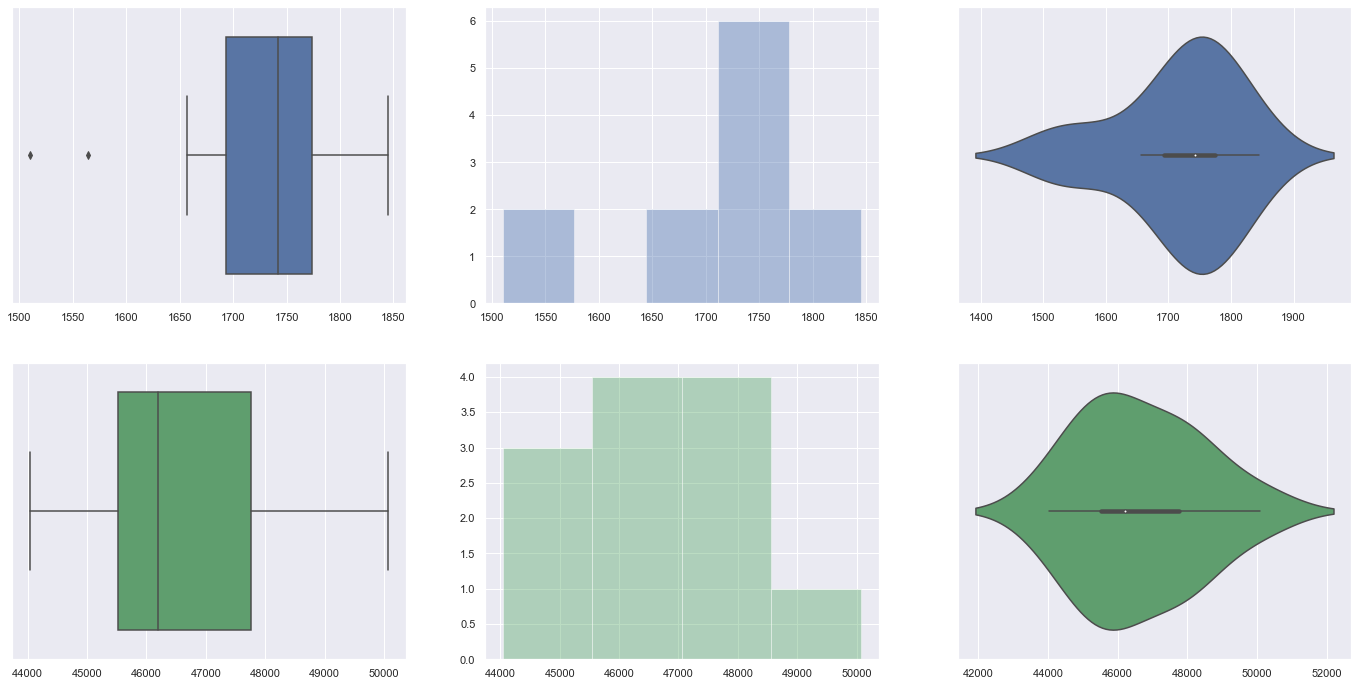

In [30]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for y_variable_train
sb.boxplot(y_variable_train, orient = "h", ax = axes[0,0])
sb.distplot(y_variable_train, kde = False, ax = axes[0,1])
sb.violinplot(y_variable_train, ax = axes[0,2])

# Plot the basic uni-variate figures for availablebnb_train
sb.boxplot(availablebnb_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(availablebnb_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(availablebnb_train, ax = axes[1,2], color = 'g')

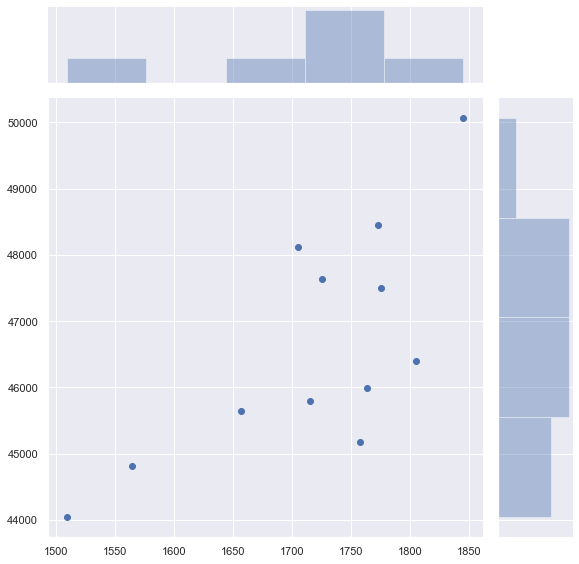

In [31]:
# Jointplot of availablebnb_train against y_variable_train
sb.jointplot(y_variable_train, availablebnb_train, height = 8)

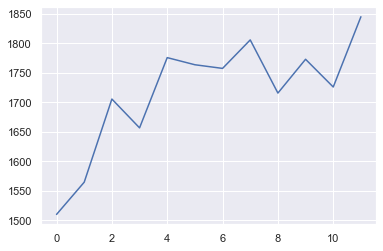

In [32]:
y_variable_train['Total_price'].plot(linewidth=1.5);

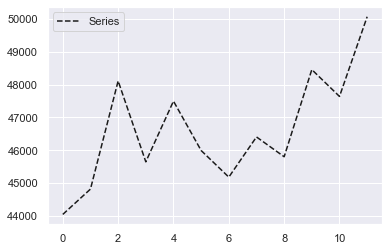

In [33]:
plt.figure(); availablebnb_train['available'].plot(style='k--', label='Series'); plt.legend()

In [34]:
y_variable_train.describe()

,Total_price
count,12.000000
mean,1716.639646
std,97.520316
min,1510.019120
25%,1693.377423
50%,1741.768465
75%,1773.708683
max,1845.092981


In [35]:
#Creating a new dataset to plot the time series
MonthDataset = pd.DataFrame({'Months': ['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12']})

In [36]:
#Reassigning the variables to each month
MonthDataset['Total_Prices'] = y_variable_train['Total_price']
MonthDataset['Available'] = availablebnb_train['available']
MonthDataset['Month'] = pd.to_datetime(MonthDataset.Months)

In [37]:
#Setting month as index to plot grh
MonthDataset = MonthDataset.set_index('Month')

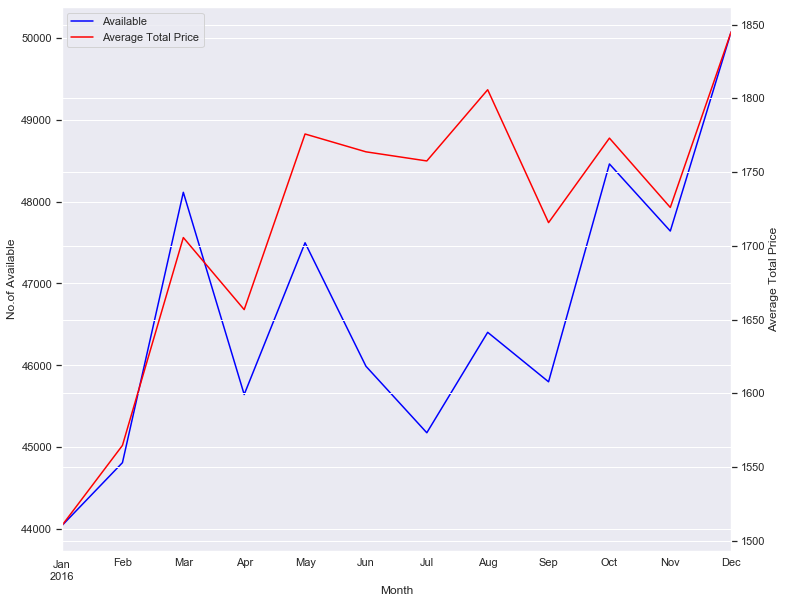

In [38]:
#Plotting the number of unavailable and average Total price over the same time series
plt.figure(figsize=(12,10))
plt.xlabel('Average value across the months')

ax1 = MonthDataset.Available.plot(color='blue', grid=True, label='Available')
ax2 = MonthDataset.Total_Prices.plot(color='red', grid=True, secondary_y=True, label='Average Total Price')
ax1.set_ylabel('No.of Available');
ax2.set_ylabel('Average Total Price');

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [39]:
#take all the rows whose date is 1/4/2016
abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime('1/4/2016')]
abc.head()

,listing_id,date,available,price,Month
468018,3543084,2016-01-04,t,192.0,1
4833,8889257,2016-01-04,t,185.0,1
973543,8053921,2016-01-04,f,0.0,1
71628,843812,2016-01-04,t,180.0,1
365453,8104742,2016-01-04,t,260.0,1


In [40]:
#get the column number of this dataframe
abc.shape[0]

2281

In [41]:
abc['available']

468018     t
4833       t
973543     f
71628      t
365453     t
          ..
515103     t
1005298    f
151563     f
1006758    f
402318     t
Name: available, Length: 2281, dtype: object

In [42]:
#change the dataframe into list
abc_list=abc['available'].values.tolist()

In [43]:
abc_list

['t',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 'f',
 't',
 't',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 't',
 't',
 'f',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 'f',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 'f',
 't',
 'f',
 't',
 't',
 't',
 'f',
 'f',
 'f',
 'f',
 't',
 't',
 't',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 'f',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 'f',
 't',
 'f',
 't',
 'f',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 'f',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't'

In [44]:
#the total available bnbs number for 4/1/2016
count_t=0
for item in abc_list:
    if item == 't':
        count_t=count_t+1
print("t:",count_t)
print("f:",abc.shape[0]-count_t)

t: 1683
f: 598


In [45]:
#create a new dataframe recording the number of available bnbs on each day
DateDataset=pd.DataFrame()

In [46]:
DateDataset['date'] = pd.date_range(start='1/4/2016', periods=365, freq='D')

In [47]:
DateDataset

,date
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08
...,...
360,2016-12-29
361,2016-12-30
362,2016-12-31
363,2017-01-01


In [48]:
DateDataset.at[0,'available']=count_t

In [49]:
DateDataset

,date,available
0,2016-01-04,1683.0
1,2016-01-05,NaN
2,2016-01-06,NaN
3,2016-01-07,NaN
4,2016-01-08,NaN
...,...,...
360,2016-12-29,NaN
361,2016-12-30,NaN
362,2016-12-31,NaN
363,2017-01-01,NaN


In [50]:
DateDataset.at[0,'unavailable']=abc.shape[0]-count_t

In [51]:
DateDataset

,date,available,unavailable
0,2016-01-04,1683.0,598.0
1,2016-01-05,NaN,NaN
2,2016-01-06,NaN,NaN
3,2016-01-07,NaN,NaN
4,2016-01-08,NaN,NaN
...,...,...,...
360,2016-12-29,NaN,NaN
361,2016-12-30,NaN,NaN
362,2016-12-31,NaN,NaN
363,2017-01-01,NaN,NaN


In [52]:
m = 1
d = 4
y = 2016
date=str(m)+'/'+str(d)+'/'+str(y)
print(date)

1/4/2016


In [53]:
ab = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
ab.head()

,listing_id,date,available,price,Month
468018,3543084,2016-01-04,t,192.0,1
4833,8889257,2016-01-04,t,185.0,1
973543,8053921,2016-01-04,f,0.0,1
71628,843812,2016-01-04,t,180.0,1
365453,8104742,2016-01-04,t,260.0,1


In [54]:
#create a dataset for Jan
m=1
y=2016
for d in range(4,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d-4,'available']=count_t
    DateDataset.at[d-4,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d-4,'average price']=average_price

In [55]:
DateDataset

,date,available,unavailable,average price
0,2016-01-04,1683.0,598.0,137.469400
1,2016-01-05,1567.0,742.0,139.199745
2,2016-01-06,1575.0,754.0,147.585397
3,2016-01-07,1381.0,920.0,161.806662
4,2016-01-08,1416.0,851.0,150.629237
...,...,...,...,...
360,2016-12-29,NaN,NaN,NaN
361,2016-12-30,NaN,NaN,NaN
362,2016-12-31,NaN,NaN,NaN
363,2017-01-01,NaN,NaN,NaN


In [56]:
# add Feb
m=2
y=2016
for d in range(1,30):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+27,'available']=count_t
    DateDataset.at[d+27,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+27,'average price']=average_price

C:\Users\Koh Yi Joshua\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [57]:
# add Mar
m=3
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+56,'available']=count_t
    DateDataset.at[d+56,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+56,'average price']=average_price

C:\Users\Koh Yi Joshua\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [58]:
# add Apr
m=4
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+87,'available']=count_t
    DateDataset.at[d+87,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+87,'average price']=average_price

In [59]:
# add May
m=5
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+117,'available']=count_t
    DateDataset.at[d+117,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+117,'average price']=average_price

In [60]:
# add Jun
m=6
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+148,'available']=count_t
    DateDataset.at[d+148,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+148,'average price']=average_price

In [61]:
# add Jul
m=7
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+178,'available']=count_t
    DateDataset.at[d+178,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+178,'average price']=average_price

In [62]:
# add Aug
m=8
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+209,'available']=count_t
    DateDataset.at[d+209,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+209,'average price']=average_price

In [63]:
# add sep
m=9
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+240,'available']=count_t
    DateDataset.at[d+240,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+240,'average price']=average_price

In [64]:
# add Oct
m=10
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+270,'available']=count_t
    DateDataset.at[d+270,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+270,'average price']=average_price

In [65]:
# add Nov
m=11
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+301,'available']=count_t
    DateDataset.at[d+301,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+301,'average price']=average_price

In [66]:
# add Dec
m=12
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+331,'available']=count_t
    DateDataset.at[d+331,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+331,'average price']=average_price

In [67]:
DateDataset

,date,available,unavailable,average price
0,2016-01-04,1683.0,598.0,137.469400
1,2016-01-05,1567.0,742.0,139.199745
2,2016-01-06,1575.0,754.0,147.585397
3,2016-01-07,1381.0,920.0,161.806662
4,2016-01-08,1416.0,851.0,150.629237
...,...,...,...,...
360,2016-12-29,1697.0,598.0,140.658220
361,2016-12-30,1680.0,609.0,146.133929
362,2016-12-31,1677.0,591.0,148.571855
363,2017-01-01,NaN,NaN,NaN


In [68]:
DateDataset = DateDataset.drop([363 , 364])

In [69]:
DateDataset.round(2)

,date,available,unavailable,average price
0,2016-01-04,1683.0,598.0,137.47
1,2016-01-05,1567.0,742.0,139.20
2,2016-01-06,1575.0,754.0,147.59
3,2016-01-07,1381.0,920.0,161.81
4,2016-01-08,1416.0,851.0,150.63
...,...,...,...,...
358,2016-12-27,1682.0,614.0,137.35
359,2016-12-28,1695.0,607.0,138.53
360,2016-12-29,1697.0,598.0,140.66
361,2016-12-30,1680.0,609.0,146.13


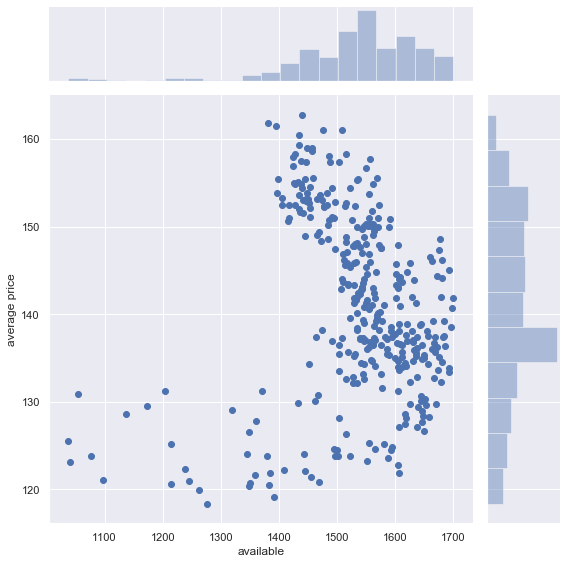

In [70]:
sb.jointplot(DateDataset['available'], DateDataset['average price'], height = 8)

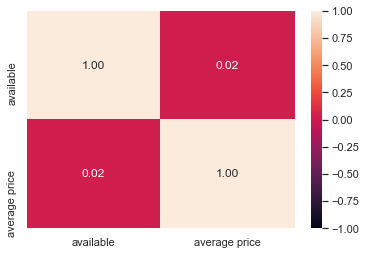

In [71]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([DateDataset['available'], DateDataset['average price'].reindex(index=DateDataset['available'].index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [72]:
DateDataset_test=pd.DataFrame()

DateDataset_test['date'] = pd.date_range(start='1/4/2016', periods=365, freq='D')

#create a dataset for Jan
m=1
y=2016
for d in range(4,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d-4,'available']=count_t
    DateDataset_test.at[d-4,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d-4,'average price']=average_price

#create a dataset for Feb
m=2
y=2016
for d in range(1,30):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+27,'available']=count_t
    DateDataset_test.at[d+27,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+27,'average price']=average_price

#create a dataset for Mar
m=3
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+56,'available']=count_t
    DateDataset_test.at[d+56,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+56,'average price']=average_price

#create a dataset for Apr
m=4
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+87,'available']=count_t
    DateDataset_test.at[d+87,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+87,'average price']=average_price

#create a dataset for May
m=5
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+117,'available']=count_t
    DateDataset_test.at[d+117,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+117,'average price']=average_price

#create a dataset for Jun
m=6
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+148,'available']=count_t
    DateDataset_test.at[d+148,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+148,'average price']=average_price

#create a dataset for July
m=7
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+178,'available']=count_t
    DateDataset_test.at[d+178,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+178,'average price']=average_price

#create a dataset for Aug
m=8
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+209,'available']=count_t
    DateDataset_test.at[d+209,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+209,'average price']=average_price

#create a dataset for Sep
m=9
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+240,'available']=count_t
    DateDataset_test.at[d+240,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+240,'average price']=average_price

#create a dataset for Oct
m=10
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+270,'available']=count_t
    DateDataset_test.at[d+270,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+270,'average price']=average_price

#create a dataset for Nov
m=11
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+301,'available']=count_t
    DateDataset_test.at[d+301,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+301,'average price']=average_price

#create a dataset for Dec
m=12
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_tests.loc[lambda df: adjusted_prices_tests['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset_test.at[d+331,'available']=count_t
    DateDataset_test.at[d+331,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset_test.at[d+331,'average price']=average_price

C:\Users\Koh Yi Joshua\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Koh Yi Joshua\anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


In [73]:
DateDataset_test = DateDataset_test.drop([363,364])

In [74]:
DateDataset_test

,date,available,unavailable,average price
0,2016-01-04,424.0,168.0,142.650943
1,2016-01-05,368.0,196.0,136.364130
2,2016-01-06,353.0,191.0,142.484419
3,2016-01-07,364.0,208.0,159.151099
4,2016-01-08,372.0,234.0,154.602151
...,...,...,...,...
358,2016-12-27,434.0,142.0,146.253456
359,2016-12-28,423.0,147.0,141.326241
360,2016-12-29,422.0,155.0,137.876777
361,2016-12-30,441.0,142.0,154.337868


In [75]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [76]:
aval = pd.DataFrame(DateDataset['available'].fillna(0.0).astype(int))
avgP = pd.DataFrame(DateDataset['average price'].fillna(0.0).astype(int))

In [77]:
aval_test = pd.DataFrame((DateDataset_test['available']).fillna(0.0).astype(int))
avgP_test = pd.DataFrame((DateDataset_test['average price']).fillna(0.0).astype(int))

In [78]:
# Train the Linear Regression model
linreg.fit(aval, avgP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [65.52879969]
Coefficients 	: a =  [[0.04842598]]


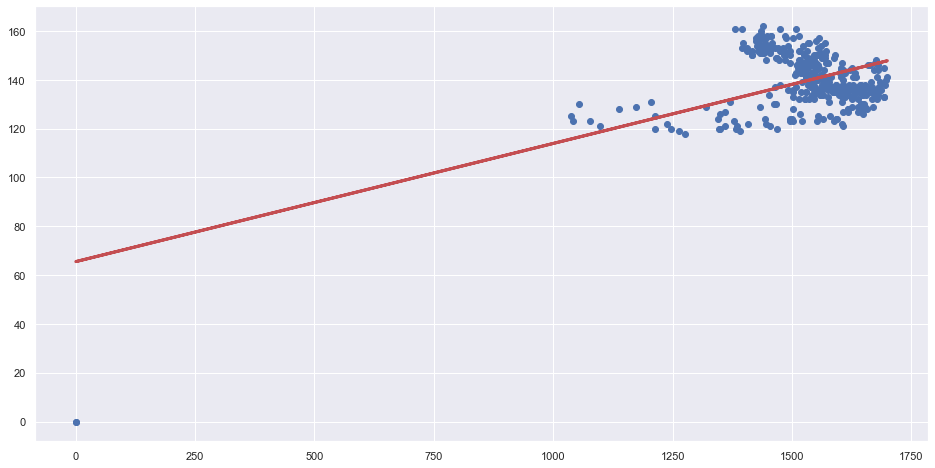

In [80]:
# Formula for the Regression line
regline_x = aval
regline_y = linreg.intercept_ + linreg.coef_ * aval

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(aval, avgP)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [81]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Predict Total values
y_train_pred = linreg.predict(aval)
y_test_pred = linreg.predict(avgP_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(aval, avgP))
print("Mean Squared Error (MSE) \t:", mean_squared_error(avgP, y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.27547530203450554
Mean Squared Error (MSE) 	: 153.43290798476252



In [82]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(aval_test, avgP_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(avgP_test, y_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -11.886816346163405
Mean Squared Error (MSE) 	: 4682.704693717078



In [83]:
listings.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [84]:
dummies = pd.get_dummies(listings.neighbourhood_group_cleansed)
dummies

,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3814,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3815,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3816,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
base = pd.DataFrame(listings['neighbourhood_group_cleansed'])
base['price'] = original_prices['price']
base['availability'] = listings['availability_365']
base

,neighbourhood_group_cleansed,price,availability
0,Queen Anne,85.0,346
1,Queen Anne,150.0,291
2,Queen Anne,975.0,220
3,Queen Anne,100.0,143
4,Queen Anne,450.0,365
...,...,...,...
3813,Other neighborhoods,359.0,32
3814,Capitol Hill,79.0,273
3815,Rainier Valley,93.0,88
3816,Capitol Hill,99.0,179


In [86]:
merged = pd.concat([base,dummies],axis='columns')
merged

,neighbourhood_group_cleansed,price,availability,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,Queen Anne,85.0,346,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Queen Anne,150.0,291,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Queen Anne,975.0,220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Queen Anne,100.0,143,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Queen Anne,450.0,365,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Other neighborhoods,359.0,32,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3814,Capitol Hill,79.0,273,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3815,Rainier Valley,93.0,88,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3816,Capitol Hill,99.0,179,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
final = merged.drop(['neighbourhood_group_cleansed'],axis='columns')
final 

,price,availability,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,85.0,346,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,150.0,291,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,975.0,220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,100.0,143,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,450.0,365,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,32,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3814,79.0,273,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3815,93.0,88,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3816,99.0,179,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [89]:
X = final.drop(['price','availability'] ,axis='columns')
X

,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3814,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3815,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3816,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
y = final.price
y 

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [91]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
model.score(X,y)

0.05610673074547934

In [93]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

In [94]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

In [95]:
# Train the Decision Tree Classifier model
dectree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
dectree.score(X,y)

0.045311681508643266

In [ ]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

In [138]:
# Setting up the Y variable (Train + Test)
price_train = pd.DataFrame(columns = [])          #Dependent variable
price_test = pd.DataFrame(columns = [])

# Setting up the X variable (Train + Test)
room_train = pd.DataFrame(columns = [])      #Independent variable
room_test = pd.DataFrame(columns = [])

# Randomly split the dataset into train and test cases (80/20 split)
from sklearn.model_selection import train_test_split
listings_train, listings_test = train_test_split(listings, test_size = 0.2)

In [139]:
dummies2 = pd.get_dummies(listings_train.room_type)
dummies2

,Entire home/apt,Private room,Shared room
3030,0,1,0
858,0,1,0
476,1,0,0
3484,0,1,0
2682,0,0,1
...,...,...,...
2925,1,0,0
3378,0,1,0
2301,1,0,0
2037,0,1,0


In [140]:
rooms = pd.DataFrame(listings_train['room_type'])
rooms['price'] = listings_train['price']
rooms

,room_type,price
3030,Private room,45.0
858,Private room,72.0
476,Entire home/apt,89.0
3484,Private room,65.0
2682,Shared room,53.0
...,...,...
2925,Entire home/apt,150.0
3378,Private room,75.0
2301,Entire home/apt,150.0
2037,Private room,60.0


In [141]:
merged2 = pd.concat([rooms,dummies2],axis='columns')
merged2

,room_type,price,Entire home/apt,Private room,Shared room
3030,Private room,45.0,0,1,0
858,Private room,72.0,0,1,0
476,Entire home/apt,89.0,1,0,0
3484,Private room,65.0,0,1,0
2682,Shared room,53.0,0,0,1
...,...,...,...,...,...
2925,Entire home/apt,150.0,1,0,0
3378,Private room,75.0,0,1,0
2301,Entire home/apt,150.0,1,0,0
2037,Private room,60.0,0,1,0


In [142]:
fin_train = merged2.drop(['room_type'],axis='columns')
fin_train

,price,Entire home/apt,Private room,Shared room
3030,45.0,0,1,0
858,72.0,0,1,0
476,89.0,1,0,0
3484,65.0,0,1,0
2682,53.0,0,0,1
...,...,...,...,...
2925,150.0,1,0,0
3378,75.0,0,1,0
2301,150.0,1,0,0
2037,60.0,0,1,0


In [144]:
x_train = fin_train.drop(['price'],axis='columns')
x_train

,Entire home/apt,Private room,Shared room
3030,0,1,0
858,0,1,0
476,1,0,0
3484,0,1,0
2682,0,0,1
...,...,...,...
2925,1,0,0
3378,0,1,0
2301,1,0,0
2037,0,1,0


In [168]:
y_train_prep = fin_train.price
y_train_prep = pd.DataFrame(y_train_prep)
y_train_prep.describe()

,price
count,3054.000000
mean,128.169941
std,89.084011
min,20.000000
25%,75.000000
50%,100.000000
75%,150.000000
max,999.000000


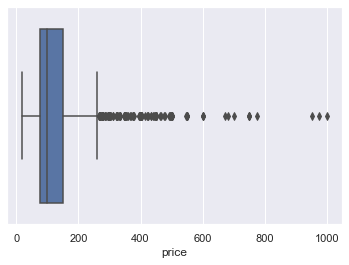

In [171]:
sb.boxplot(y_train_prep['price'], orient = "h")

In [179]:
y_train_prep['high'] = np.where(y_train_prep['price'] > 200 ,1,0) 
y_train_prep['low'] = np.where(y_train_prep['price'] < 60 ,1,0) 
y_train_prep

,price,high,low
3030,45.0,0,1
858,72.0,0,0
476,89.0,0,0
3484,65.0,0,0
2682,53.0,0,1
...,...,...,...
2925,150.0,0,0
3378,75.0,0,0
2301,150.0,0,0
2037,60.0,0,0


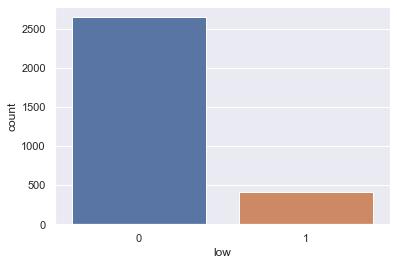

In [180]:
sb.countplot(y_train_prep["low"])

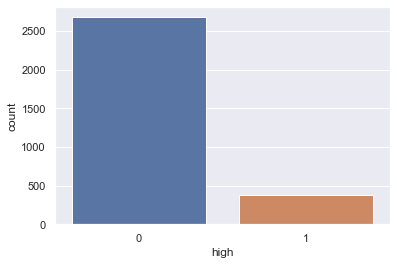

In [181]:
sb.countplot(y_train_prep["high"])

In [186]:
y_train = y_train_prep['high']

In [189]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [149]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Classification Accuracy 	: 0.8772102161100196


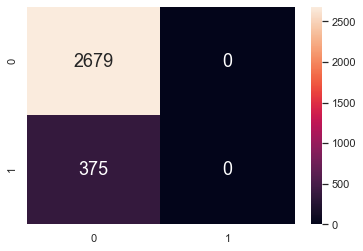

In [190]:
# Predict high or not corresponding to Train data
y_train_pred2 = dectree.predict(x_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(x_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [191]:
dummies3 = pd.get_dummies(listings_test.room_type)
dummies3

rooms_test = pd.DataFrame(listings_test['room_type'])
rooms_test['price'] = listings_test['price']
rooms_test

merged3 = pd.concat([rooms_test,dummies3],axis='columns')
merged3

fin_test = merged3.drop(['room_type'],axis='columns')
fin_test

x_test = fin_test.drop(['price'],axis='columns')
x_test

y_test_prep = fin_test.price
y_test_prep = pd.DataFrame(y_test_prep)
y_test_prep.describe()

y_test_prep['high'] = np.where(y_test_prep['price'] > 200 ,1,0) 
y_test_prep['low'] = np.where(y_test_prep['price'] < 60 ,1,0) 
y_test_prep

y_test = y_test_prep['high']

# Predict corresponding to Test
test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(x_test, y_test))


Classification Accuracy 	: 0.8926701570680629


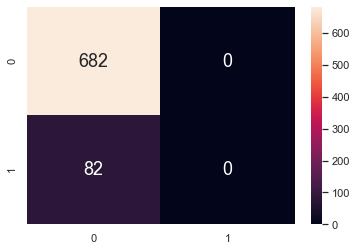

In [193]:
# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})